In [11]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
class k_arm_bandit:
    def __init__(self,k,alpha,flag):
        self.reward=list(np.random.normal(loc=4,scale=1,size=10)) #赌博机的平均收益值
        self.right_oper=np.argmax(self.reward)
        self.steps=0
        self.k=k
        self.flag=flag
        
        self.average_reward=0 #当前轮次的每个动作的平均收益
        self.H=[0]*k #当前轮次每个动作的操作次数
        self.alpha=alpha
        
        self.all_average_reward=[] #当前轮次的平均收益
        self.all_reward=0
        self.right_operations=[] #当前轮次正确操作的概率
        self.right_operations_number=0
    
    def get_action(self,pi):
        pii=[]
        pii.append(0)
        for i in range(self.k):
            pii.append(pi[i])
            if i!=0:
                pii[i+1]=pii[i]+pii[i+1]
        x=random.random()
        for i in range(self.k):
            if x>=pii[i] and x<=pii[i+1]:
                return i
        
    def get_reward(self,oper_id):
        return np.random.normal(loc=self.reward[oper_id],scale=1)
    
    def update(self):
        pi=[]
        s=np.sum(np.exp(self.H))
        for i in range(self.k):
            pi.append(math.exp(self.H[i])/s)
        A=self.get_action(pi)
        R=self.get_reward(A)
        
        for i in range(self.k):
            if self.flag: #包含基准项
                if i==A:
                    self.H[i]+=self.alpha*(R-self.average_reward)*(1-pi[i])
                else:
                    self.H[i]-=self.alpha*(R-self.average_reward)*pi[i]
            else: #不包含基准项
                if i==A:
                    self.H[i]+=self.alpha*(R)*(1-pi[i])
                else:
                    self.H[i]-=self.alpha*(R)*pi[i]
        
        self.steps+=1
        self.average_reward=self.average_reward+1.0/self.steps*(R-self.average_reward)
        
        self.all_reward+=R
        if A==self.right_oper:
            self.right_operations_number+=1
        self.all_average_reward.append(self.all_reward/self.steps)
        self.right_operations.append(self.right_operations_number/self.steps)

In [13]:
class gradient:
    def __init__(self,alpha,flag):
        self.all_reward=[0]*5000
        self.all_right_oper=[0]*5000
        self.iter_num=2000
        self.alpha=alpha
        self.flag=flag
        
    def wk(self):
        for iteration in range(self.iter_num):
            bandit=k_arm_bandit(10,self.alpha,self.flag) #flag=True:包含基准项，反之不包含基准项
            for steps in range(5000):
                bandit.update()
            for i in range(5000):
                self.all_reward[i]+=bandit.all_average_reward[i]/self.iter_num
                self.all_right_oper[i]+=bandit.right_operations[i]/self.iter_num*100
            if (iteration+1)%50==0:
                print("iter : {} done".format(iteration+1))

In [14]:
g1=gradient(0.1,True)
g1.wk()

iter : 50 done
iter : 100 done
iter : 150 done
iter : 200 done
iter : 250 done
iter : 300 done
iter : 350 done
iter : 400 done
iter : 450 done
iter : 500 done
iter : 550 done
iter : 600 done
iter : 650 done
iter : 700 done
iter : 750 done
iter : 800 done
iter : 850 done
iter : 900 done
iter : 950 done
iter : 1000 done
iter : 1050 done
iter : 1100 done
iter : 1150 done
iter : 1200 done
iter : 1250 done
iter : 1300 done
iter : 1350 done
iter : 1400 done
iter : 1450 done
iter : 1500 done
iter : 1550 done
iter : 1600 done
iter : 1650 done
iter : 1700 done
iter : 1750 done
iter : 1800 done
iter : 1850 done
iter : 1900 done
iter : 1950 done
iter : 2000 done


In [15]:
g2=gradient(0.4,True)
g2.wk()

iter : 50 done
iter : 100 done
iter : 150 done
iter : 200 done
iter : 250 done
iter : 300 done
iter : 350 done
iter : 400 done
iter : 450 done
iter : 500 done
iter : 550 done
iter : 600 done
iter : 650 done
iter : 700 done
iter : 750 done
iter : 800 done
iter : 850 done
iter : 900 done
iter : 950 done
iter : 1000 done
iter : 1050 done
iter : 1100 done
iter : 1150 done
iter : 1200 done
iter : 1250 done
iter : 1300 done
iter : 1350 done
iter : 1400 done
iter : 1450 done
iter : 1500 done
iter : 1550 done
iter : 1600 done
iter : 1650 done
iter : 1700 done
iter : 1750 done
iter : 1800 done
iter : 1850 done
iter : 1900 done
iter : 1950 done
iter : 2000 done


In [16]:
g3=gradient(0.1,False)
g3.wk()

iter : 50 done
iter : 100 done
iter : 150 done
iter : 200 done
iter : 250 done
iter : 300 done
iter : 350 done
iter : 400 done
iter : 450 done
iter : 500 done
iter : 550 done
iter : 600 done
iter : 650 done
iter : 700 done
iter : 750 done
iter : 800 done
iter : 850 done
iter : 900 done
iter : 950 done
iter : 1000 done
iter : 1050 done
iter : 1100 done
iter : 1150 done
iter : 1200 done
iter : 1250 done
iter : 1300 done
iter : 1350 done
iter : 1400 done
iter : 1450 done
iter : 1500 done
iter : 1550 done
iter : 1600 done
iter : 1650 done
iter : 1700 done
iter : 1750 done
iter : 1800 done
iter : 1850 done
iter : 1900 done
iter : 1950 done
iter : 2000 done


In [17]:
g4=gradient(0.4,False)
g4.wk()

iter : 50 done
iter : 100 done
iter : 150 done
iter : 200 done
iter : 250 done
iter : 300 done
iter : 350 done
iter : 400 done
iter : 450 done
iter : 500 done
iter : 550 done
iter : 600 done
iter : 650 done
iter : 700 done
iter : 750 done
iter : 800 done
iter : 850 done
iter : 900 done
iter : 950 done
iter : 1000 done
iter : 1050 done
iter : 1100 done
iter : 1150 done
iter : 1200 done
iter : 1250 done
iter : 1300 done
iter : 1350 done
iter : 1400 done
iter : 1450 done
iter : 1500 done
iter : 1550 done
iter : 1600 done
iter : 1650 done
iter : 1700 done
iter : 1750 done
iter : 1800 done
iter : 1850 done
iter : 1900 done
iter : 1950 done
iter : 2000 done


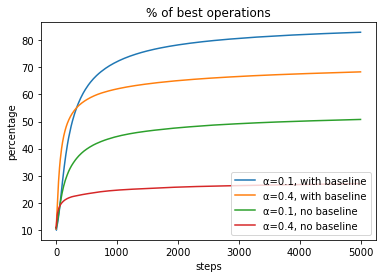

In [19]:
x=[i for i in range(1,5001)]
plt.plot(x,g1.all_right_oper,label='α=0.1, with baseline')
plt.plot(x,g2.all_right_oper,label='α=0.4, with baseline')
plt.plot(x,g3.all_right_oper,label='α=0.1, no baseline')
plt.plot(x,g4.all_right_oper,label='α=0.4, no baseline')
plt.xlabel('steps')
plt.ylabel('percentage')
plt.title("% of best operations")
plt.legend()